In [3]:
# -----------------------------------------------------------
# 📁 EIS Batch Loader for .mat Files (Warwick Dataset Format)
# -----------------------------------------------------------

import os
import re
import scipy.io
import pandas as pd
from pathlib import Path
from tqdm import tqdm

# ------------------------
# 🔍 Metadata Parser
# ------------------------
def parse_filename_metadata(filename: str):
    pattern = r"Cell(\d+)_([0-9]+)SOH_([0-9]+)degC_([0-9]+)SOC_([0-9]+)"
    match = re.search(pattern, filename)
    if match:
        cell_id = f"Cell{match.group(1)}"
        soh = int(match.group(2))
        temp = int(match.group(3))
        soc = int(match.group(4))
        real_soh = int(match.group(5)) / 100
        return cell_id, soh, real_soh, soc, temp
    else:
        return None, None, None, None, None

# ------------------------
# 📥 Load All EIS .mat Files
# ------------------------
def load_all_eis_mat_files(folder_path: str):
    all_data = []
    folder = Path(folder_path)
    mat_files = list(folder.glob("*.mat"))

    for file in tqdm(mat_files, desc="Loading EIS files"):
        metadata = parse_filename_metadata(file.stem)
        if None in metadata:
            continue

        try:
            mat = scipy.io.loadmat(file)
            for key, value in mat.items():
                if isinstance(value, (list, tuple)):
                    continue
                if hasattr(value, 'shape') and value.ndim == 2 and value.shape[1] >= 3:
                    df = pd.DataFrame(value[:, :3], columns=["Frequency(Hz)", "Re(Z)", "Im(Z)"])
                    df['CellID'], df['SOH'], df['RealSOH'], df['SOC'], df['Temp'] = metadata
                    all_data.append(df)
                    break
        except Exception as e:
            print(f"⚠️ Error reading {file.name}: {e}")
            continue

    if not all_data:
        raise ValueError("No valid .mat files loaded.")
        
    return pd.concat(all_data, ignore_index=True)

# ------------------------
# ✅ Usage Example
# ------------------------

# ⚠️ Make sure you use raw string (prefix with 'r') for Windows paths with backslashes
eis_folder_path = r"C:\Users\tmgon\OneDrive - Edith Cowan University\00 - Megallan Power\NMC Batteries Warwick Station\NMC\DIB_Data\EIS_Test_mat_files"

# Load the full dataset
eis_df = load_all_eis_mat_files(eis_folder_path)

# Preview first few rows
eis_df.head(10)


Loading EIS files: 100%|██████████| 360/360 [00:00<00:00, 542.81it/s]


,Frequency(Hz),Re(Z),Im(Z),CellID,SOH,RealSOH,SOC,Temp
0,10000.0,0.02995,0.031600,Cell02,95,95.05,5,15
1,7943.0,0.02827,0.026170,Cell02,95,95.05,5,15
2,6310.0,0.02704,0.021430,Cell02,95,95.05,5,15
3,5012.0,0.02599,0.017360,Cell02,95,95.05,5,15
4,3981.0,0.02499,0.013770,Cell02,95,95.05,5,15
5,3162.0,0.02480,0.011110,Cell02,95,95.05,5,15
6,2512.0,0.02442,0.008638,Cell02,95,95.05,5,15
7,1995.0,0.02387,0.006692,Cell02,95,95.05,5,15
8,1585.0,0.02383,0.004985,Cell02,95,95.05,5,15
9,1259.0,0.02394,0.003548,Cell02,95,95.05,5,15


In [17]:
eis_df.describe()

,Frequency(Hz),Re(Z),Im(Z),SOH,RealSOH,SOC,Temp
count,21960.000000,21960.000000,21960.000000,21960.000000,21960.00000,21960.000000,21960.000000
mean,797.097582,0.029719,0.000229,90.000000,90.34750,48.000000,25.000000
std,1951.144325,0.007403,0.007416,7.217043,7.21319,32.650399,8.165152
min,0.010000,0.022610,-0.035230,80.000000,80.46000,5.000000,15.000000
25%,0.316200,0.025330,-0.002455,85.000000,83.07250,20.000000,15.000000
50%,10.000000,0.027710,-0.001167,90.000000,90.67000,50.000000,25.000000
75%,316.200000,0.031280,-0.000125,95.000000,96.12750,70.000000,35.000000
max,10000.000000,0.087100,0.035420,100.000000,100.00000,95.000000,35.000000


In [19]:
eis_df.columns

Index(['Frequency(Hz)', 'Re(Z)', 'Im(Z)', 'CellID', 'SOH', 'RealSOH', 'SOC',
       'Temp'],
      dtype='object')

In [5]:
from pathlib import Path

# Path to your EIS .mat files folder (same as before)
eis_folder_path = Path(r"C:\Users\tmgon\OneDrive - Edith Cowan University\00 - Megallan Power\NMC Batteries Warwick Station\NMC\DIB_Data\EIS_Test_mat_files")

# List all .mat file names
mat_filenames = [file.name for file in eis_folder_path.glob("*.mat")]

# Display file count and a sample
print(f"Total .mat files: {len(mat_filenames)}")
print("First 10 files:")
for name in mat_filenames[:360]:
    print(name)


Total .mat files: 360
First 10 files:
Cell02_95SOH_15degC_05SOC_9505.mat
Cell02_95SOH_15degC_20SOC_9505.mat
Cell02_95SOH_15degC_50SOC_9505.mat
Cell02_95SOH_15degC_70SOC_9505.mat
Cell02_95SOH_15degC_95SOC_9505.mat
Cell02_95SOH_25degC_05SOC_9505.mat
Cell02_95SOH_25degC_20SOC_9505.mat
Cell02_95SOH_25degC_50SOC_9505.mat
Cell02_95SOH_25degC_70SOC_9505.mat
Cell02_95SOH_25degC_95SOC_9505.mat
Cell02_95SOH_35degC_05SOC_9505.mat
Cell02_95SOH_35degC_20SOC_9505.mat
Cell02_95SOH_35degC_50SOC_9505.mat
Cell02_95SOH_35degC_70SOC_9505.mat
Cell02_95SOH_35degC_95SOC_9505.mat
Cell03_95SOH_15degC_05SOC_9621.mat
Cell03_95SOH_15degC_20SOC_9621.mat
Cell03_95SOH_15degC_50SOC_9621.mat
Cell03_95SOH_15degC_70SOC_9621.mat
Cell03_95SOH_15degC_95SOC_9621.mat
Cell03_95SOH_25degC_05SOC_9621.mat
Cell03_95SOH_25degC_20SOC_9621.mat
Cell03_95SOH_25degC_50SOC_9621.mat
Cell03_95SOH_25degC_70SOC_9621.mat
Cell03_95SOH_25degC_95SOC_9621.mat
Cell03_95SOH_35degC_05SOC_9621.mat
Cell03_95SOH_35degC_20SOC_9621.mat
Cell03_95SOH_35de

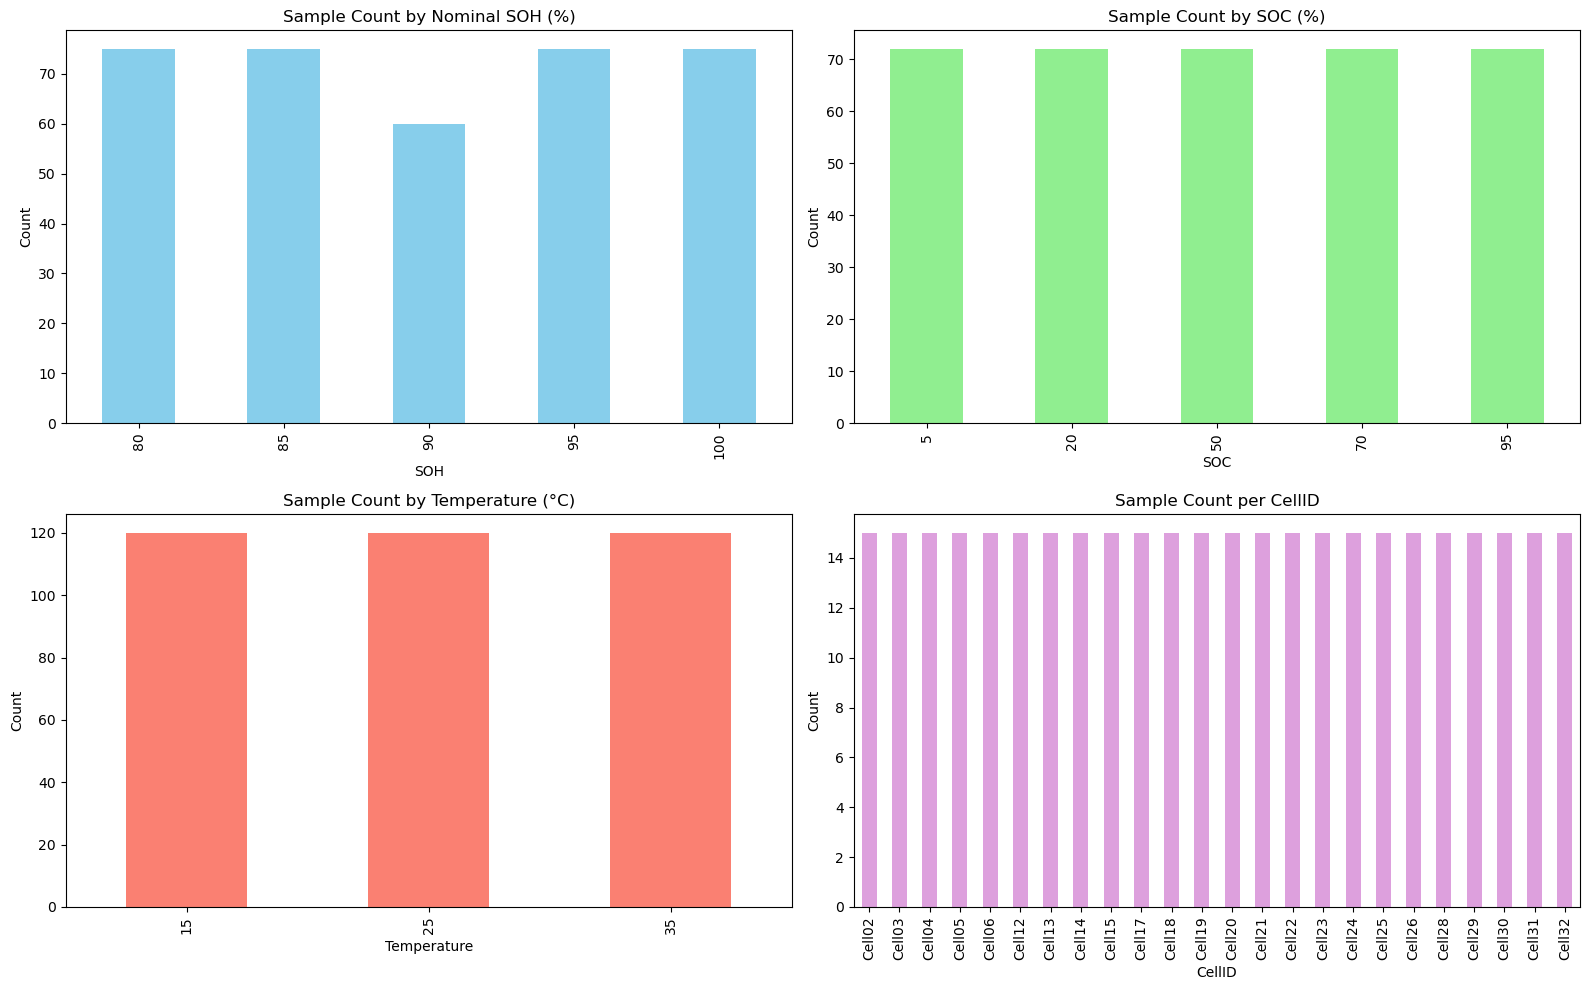

In [6]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# ⚙️ 1. Define your .mat file directory
mat_dir = Path(r"C:\Users\tmgon\OneDrive - Edith Cowan University\00 - Megallan Power\NMC Batteries Warwick Station\NMC\DIB_Data\EIS_Test_mat_files")
mat_files = list(mat_dir.glob("*.mat"))

# 📥 2. Extract metadata from filenames
def parse_metadata_from_filename(filename):
    pattern = r"Cell(\d+)_([0-9]+)SOH_([0-9]+)degC_([0-9]+)SOC_([0-9]+)"
    match = re.search(pattern, filename)
    if match:
        return {
            "CellID": f"Cell{match.group(1)}",
            "SOH": int(match.group(2)),
            "Temp": int(match.group(3)),
            "SOC": int(match.group(4)),
            "RealSOH": int(match.group(5)) / 100
        }
    else:
        return None

metadata_list = [parse_metadata_from_filename(f.name) for f in mat_files if parse_metadata_from_filename(f.name)]
df_meta = pd.DataFrame(metadata_list)

# 📊 3. Plot distribution of samples
plt.figure(figsize=(16, 10))

# Subplot 1: SOH distribution
plt.subplot(2, 2, 1)
df_meta['SOH'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Sample Count by Nominal SOH (%)")
plt.xlabel("SOH")
plt.ylabel("Count")

# Subplot 2: SOC distribution
plt.subplot(2, 2, 2)
df_meta['SOC'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title("Sample Count by SOC (%)")
plt.xlabel("SOC")
plt.ylabel("Count")

# Subplot 3: Temperature distribution
plt.subplot(2, 2, 3)
df_meta['Temp'].value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title("Sample Count by Temperature (°C)")
plt.xlabel("Temperature")
plt.ylabel("Count")

# Subplot 4: Samples per Cell
plt.subplot(2, 2, 4)
df_meta['CellID'].value_counts().sort_index().plot(kind='bar', color='plum')
plt.title("Sample Count per CellID")
plt.xlabel("CellID")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


C:\Users\tmgon\AppData\Local\Temp\ipykernel_6176\3457410234.py:55: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 0.88, 0.95])
C:\Users\tmgon\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


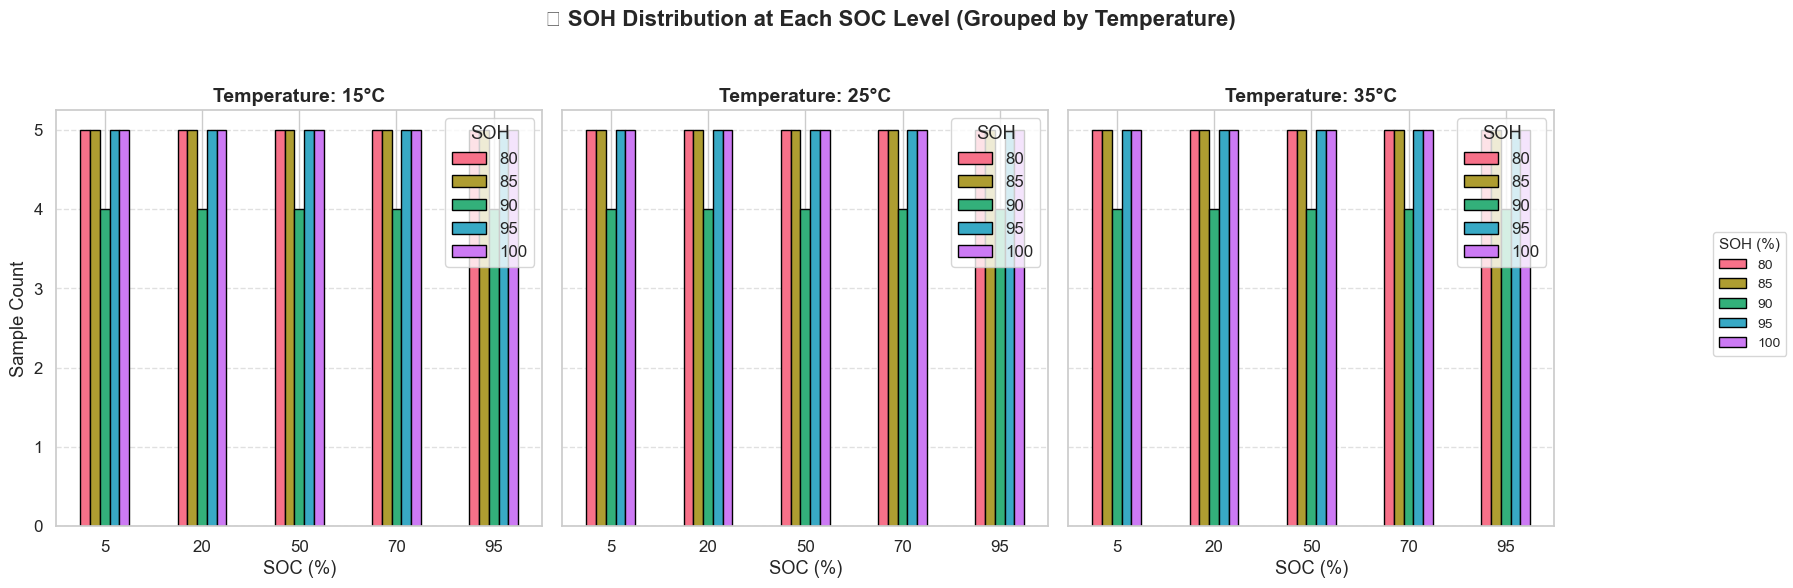

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pathlib import Path

# -----------------------------
# 1. Load metadata from filenames
# -----------------------------
mat_dir = Path(r"C:\Users\tmgon\OneDrive - Edith Cowan University\00 - Megallan Power\NMC Batteries Warwick Station\NMC\DIB_Data\EIS_Test_mat_files")
mat_files = list(mat_dir.glob("*.mat"))

def parse_metadata_from_filename(filename):
    pattern = r"Cell(\d+)_([0-9]+)SOH_([0-9]+)degC_([0-9]+)SOC_([0-9]+)"
    match = re.search(pattern, filename)
    if match:
        return {
            "CellID": f"Cell{match.group(1)}",
            "SOH": int(match.group(2)),
            "Temp": int(match.group(3)),
            "SOC": int(match.group(4)),
            "RealSOH": int(match.group(5)) / 100
        }
    return None

metadata = [parse_metadata_from_filename(f.name) for f in mat_files if parse_metadata_from_filename(f.name)]
df_meta = pd.DataFrame(metadata)

# -----------------------------
# 2. Plot: One grouped bar chart per temperature
# -----------------------------
sns.set(style="whitegrid", font_scale=1.1)
unique_temps = sorted(df_meta["Temp"].unique())
n_temps = len(unique_temps)
colors = sns.color_palette("husl", len(df_meta["SOH"].unique()))

fig, axes = plt.subplots(1, n_temps, figsize=(6 * n_temps, 6), sharey=True)

for i, temp in enumerate(unique_temps):
    ax = axes[i]
    df_temp = df_meta[df_meta["Temp"] == temp]
    pivot = df_temp.groupby(["SOC", "SOH"]).size().unstack(fill_value=0).sort_index()
    pivot.plot(kind="bar", stacked=False, color=colors, edgecolor="black", ax=ax)

    ax.set_title(f"Temperature: {temp}°C", fontsize=14, weight='bold')
    ax.set_xlabel("SOC (%)")
    ax.set_ylabel("Sample Count" if i == 0 else "")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

# Shared legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title="SOH (%)", loc="center right", fontsize=10, title_fontsize=11)
plt.suptitle("📊 SOH Distribution at Each SOC Level (Grouped by Temperature)", fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 0.88, 0.95])
plt.show()


# PCA + t-SNE on EIS Curve

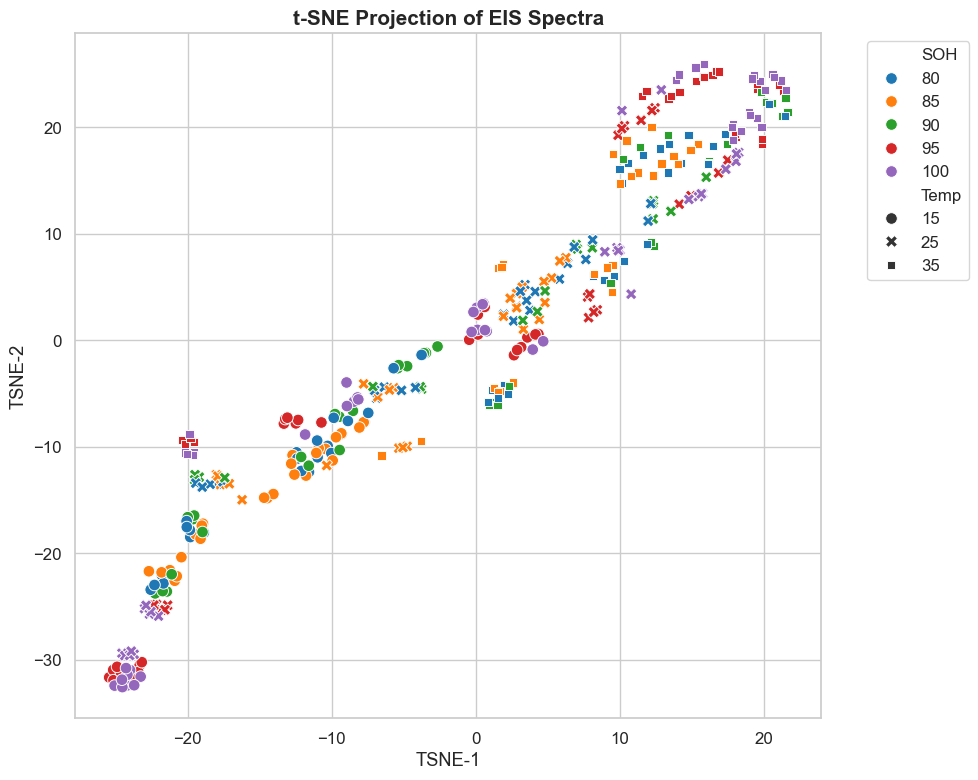

In [12]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------------------
# 1. Load EIS .mat file data (already done)
# Assume you already have a DataFrame like this:
# Columns: Frequency(Hz), Re(Z), Im(Z), CellID, SOH, RealSOH, SOC, Temp
# ----------------------------------------

# Group by file (unique condition) — we'll treat each file as a sample
grouped = eis_df.groupby(['CellID', 'SOH', 'SOC', 'Temp'])

# ----------------------------------------
# 2. Convert each EIS curve into a feature vector
# We'll just concatenate Re(Z) and Im(Z) into a long vector
# ----------------------------------------
features = []
labels = []

for (cell, soh, soc, temp), group in grouped:
    # Sort by frequency to ensure consistent order
    g_sorted = group.sort_values("Frequency(Hz)")
    vec = np.concatenate([g_sorted['Re(Z)'].values, g_sorted['Im(Z)'].values])
    features.append(vec)
    labels.append({
        "CellID": cell,
        "SOH": soh,
        "SOC": soc,
        "Temp": temp
    })

X = np.array(features)
df_labels = pd.DataFrame(labels)

# ----------------------------------------
# 3. Apply PCA (optional before t-SNE)
# ----------------------------------------
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

# ----------------------------------------
# 4. Apply t-SNE
# ----------------------------------------
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# Add embeddings to label DataFrame
df_labels['TSNE-1'] = X_tsne[:, 0]
df_labels['TSNE-2'] = X_tsne[:, 1]

# ----------------------------------------
# 5. Plot t-SNE by SOH, SOC, Temp
# ----------------------------------------
sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_labels, x="TSNE-1", y="TSNE-2", hue="SOH", style="Temp", palette="tab10", s=70)
plt.title("t-SNE Projection of EIS Spectra", fontsize=15, weight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Rows = SOC levels → 5, 20, 50, 70, 95%

Columns = SOH levels → 100, 95, 90, 85, 80%

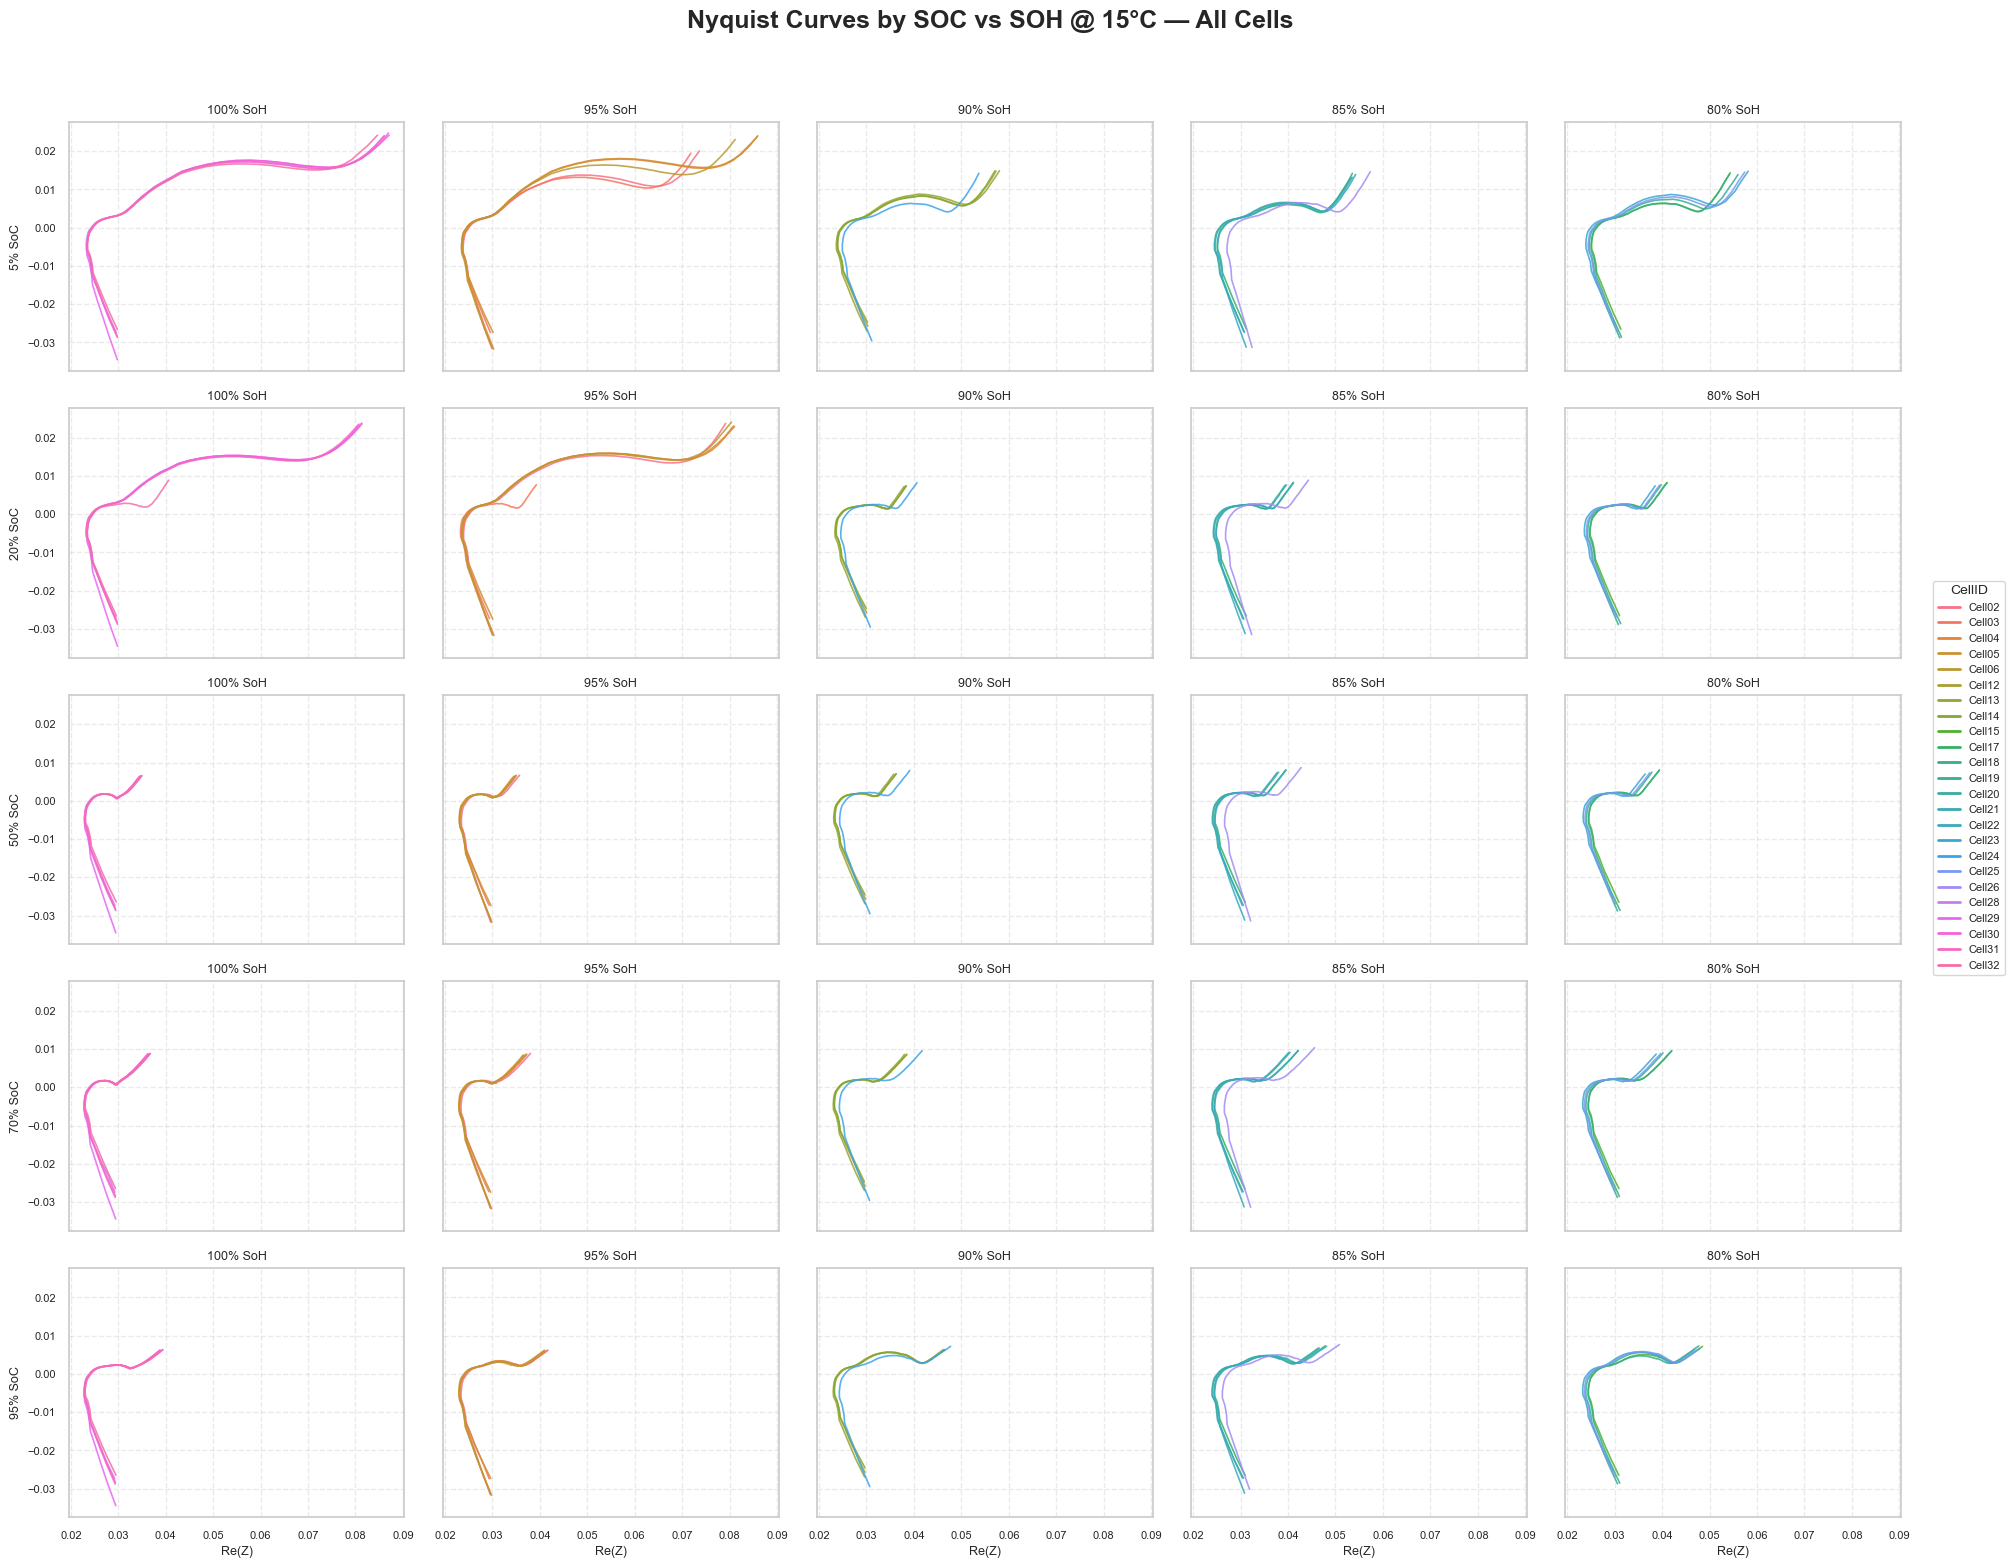

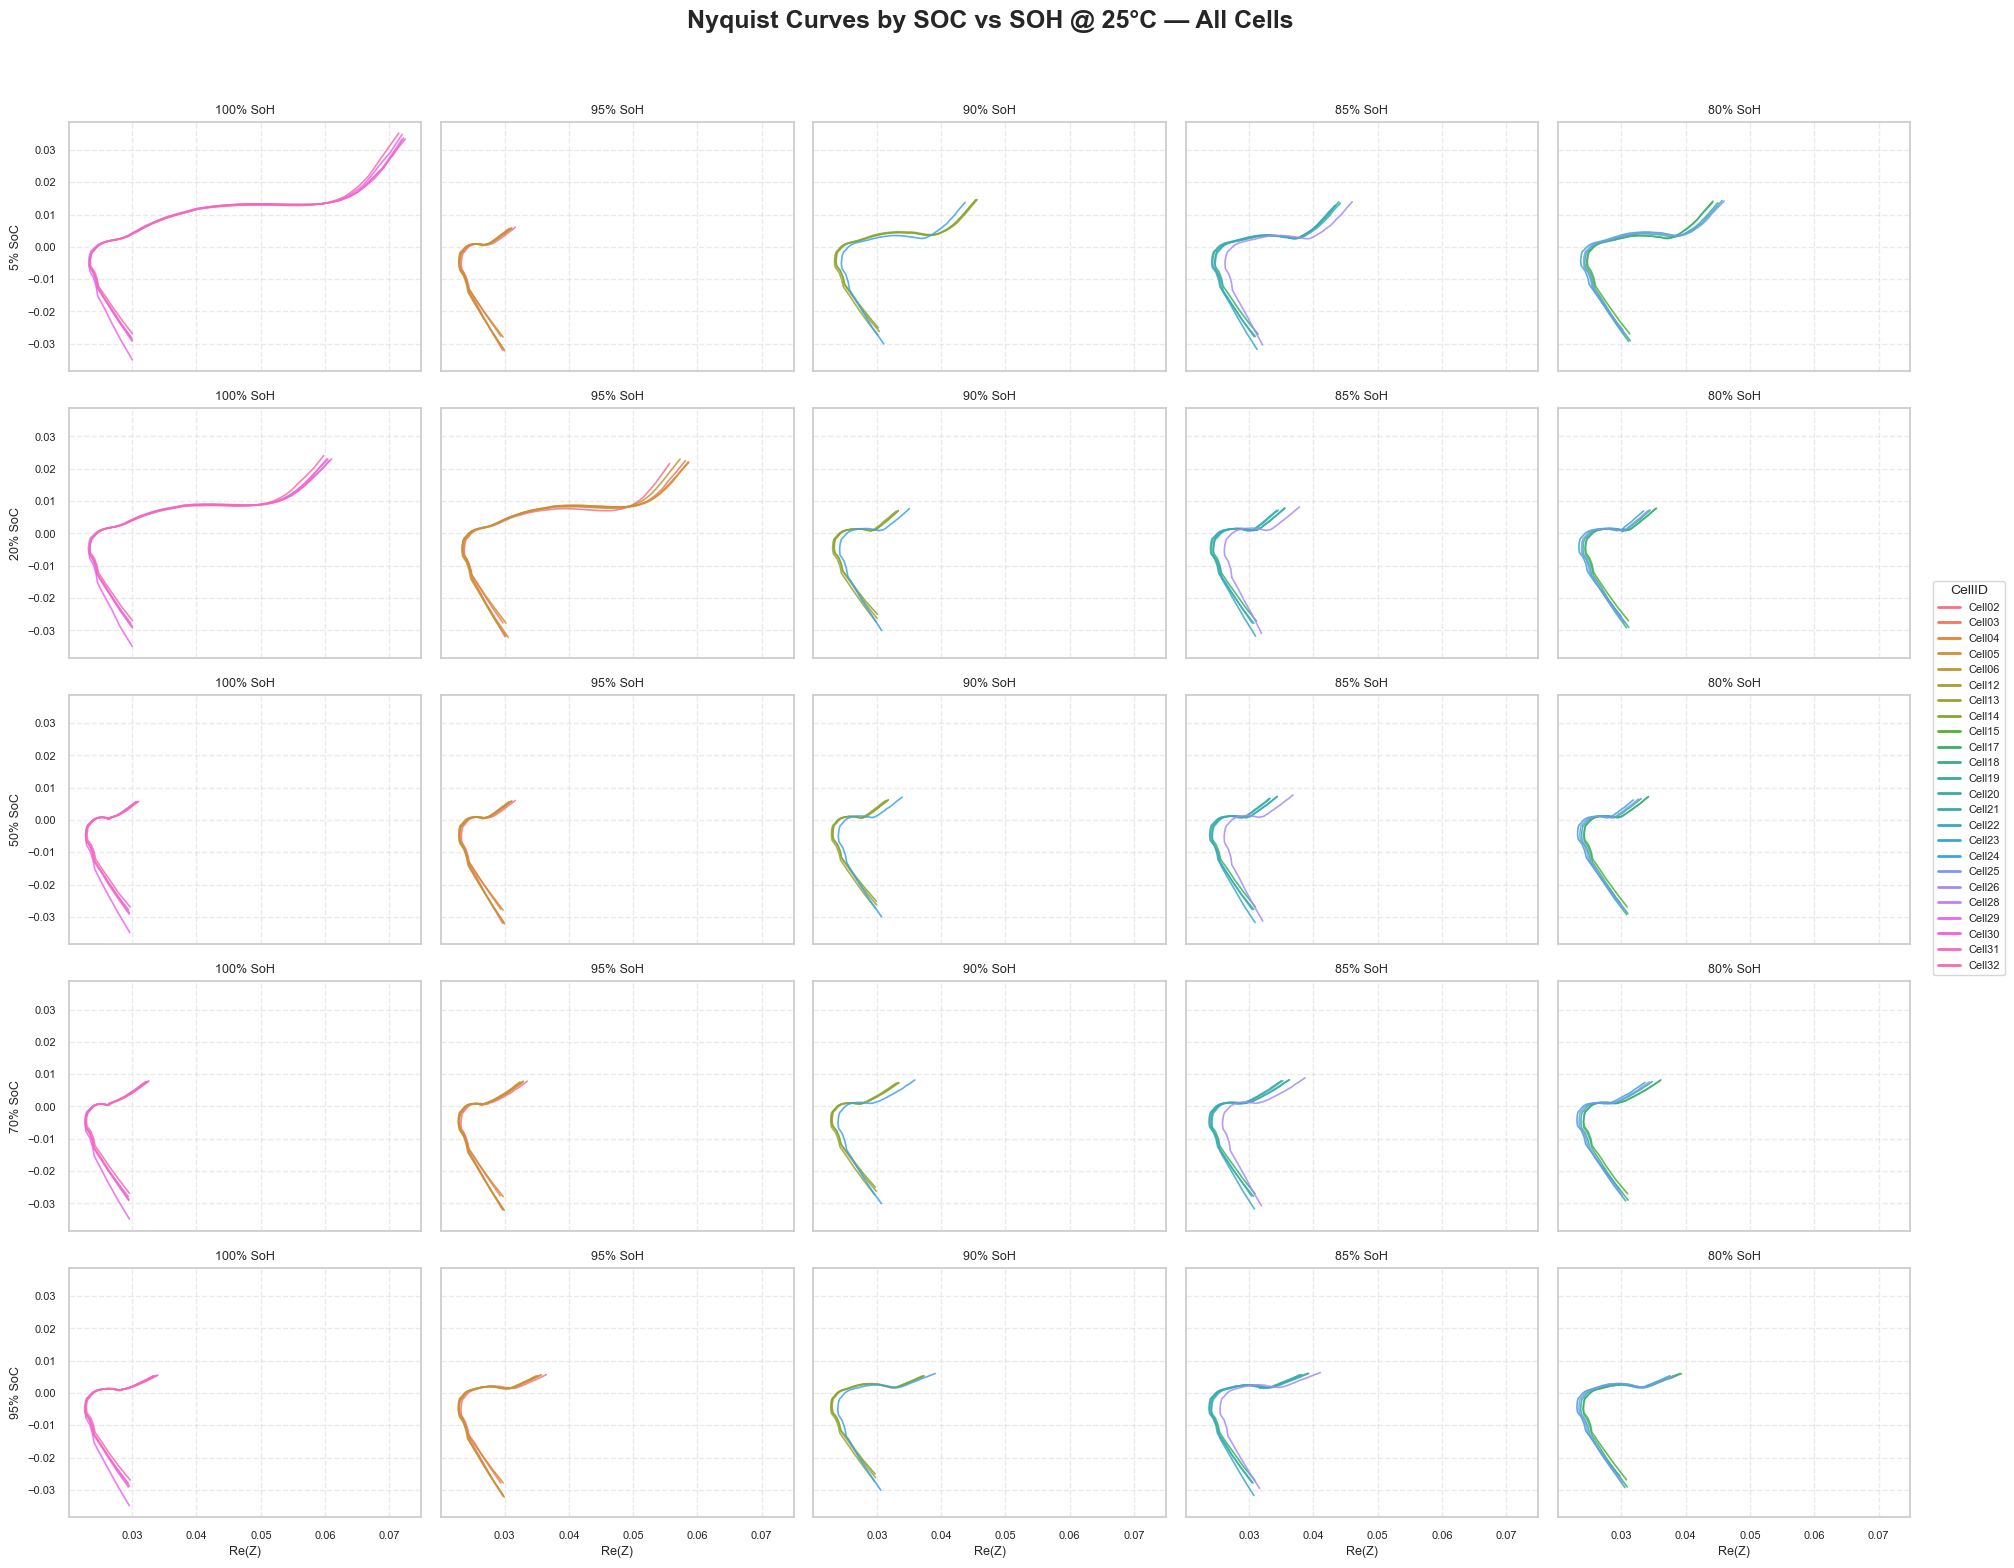

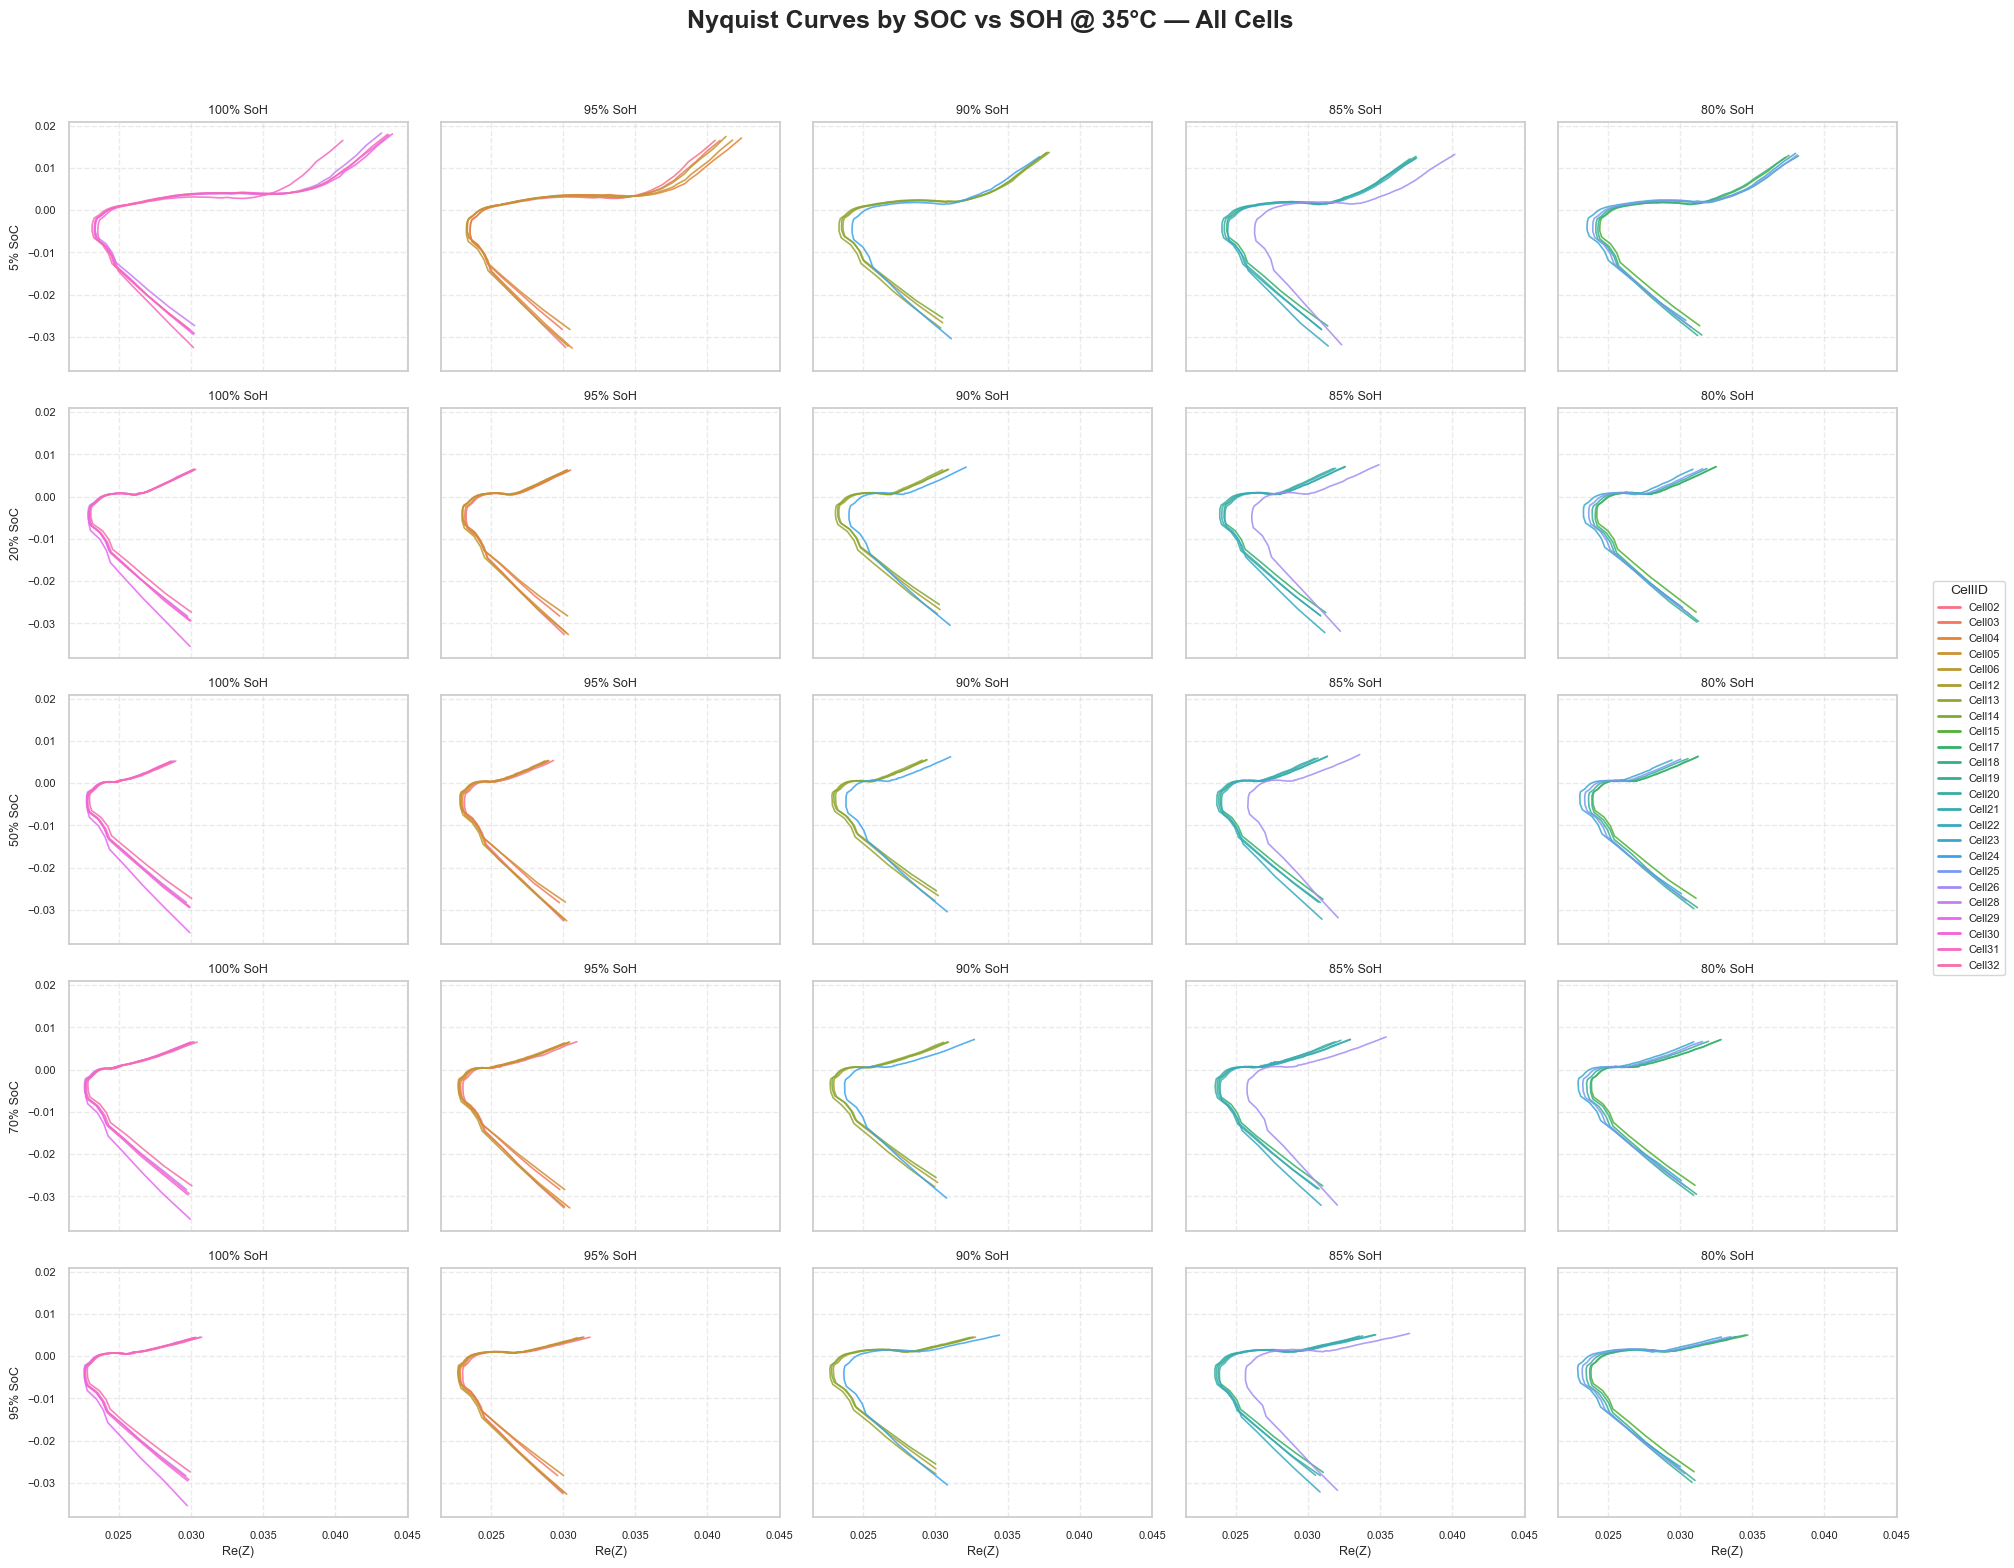

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_full_nyquist_grid_all_cells(eis_df):
    """
    For each temperature, creates a 5x5 grid (SOC x SOH) of Nyquist plots.
    All cells are included and colored by CellID.
    """
    temps = sorted(eis_df["Temp"].unique())
    sohs = sorted(eis_df["SOH"].unique(), reverse=True)  # e.g., 100 → 80
    socs = sorted(eis_df["SOC"].unique())                # e.g., 5 → 95

    for temp in temps:
        df_temp = eis_df[eis_df["Temp"] == temp]
        unique_cells = sorted(df_temp["CellID"].unique())
        palette = sns.color_palette("husl", n_colors=len(unique_cells))
        cell_color_map = dict(zip(unique_cells, palette))

        fig, axes = plt.subplots(len(socs), len(sohs), figsize=(20, 16), sharex=True, sharey=True)
        fig.suptitle(f"Nyquist Curves by SOC vs SOH @ {temp}°C — All Cells", fontsize=18, weight='bold')

        for i, soc in enumerate(socs):
            for j, soh in enumerate(sohs):
                ax = axes[i, j]
                df_sub = df_temp[(df_temp["SOC"] == soc) & (df_temp["SOH"] == soh)]

                if df_sub.empty:
                    ax.set_title(f"{soh}% SoH", fontsize=9)
                    ax.set_xticks([]); ax.set_yticks([])
                    continue

                for cell_id in df_sub["CellID"].unique():
                    group = df_sub[df_sub["CellID"] == cell_id].sort_values("Frequency(Hz)")
                    ax.plot(
                        group["Re(Z)"],
                        -group["Im(Z)"],
                        label=cell_id,
                        color=cell_color_map[cell_id],
                        linewidth=1.2,
                        alpha=0.85
                    )

                ax.set_title(f"{soh}% SoH", fontsize=9)
                if j == 0:
                    ax.set_ylabel(f"{soc}% SoC", fontsize=9)
                if i == len(socs) - 1:
                    ax.set_xlabel("Re(Z)", fontsize=9)

                ax.grid(True, linestyle='--', alpha=0.4)
                ax.tick_params(labelsize=8)

        # Shared legend
        handles = [plt.Line2D([0], [0], color=cell_color_map[c], lw=2) for c in unique_cells]
        labels = unique_cells
        fig.legend(handles, labels, title="CellID", loc='center right', bbox_to_anchor=(1.01, 0.5), fontsize=8, title_fontsize=10)

        plt.tight_layout(rect=[0, 0, 0.97, 0.96])
        plt.show()
plot_full_nyquist_grid_all_cells(eis_df)


# Load Capacity Dataset

In [29]:
from pathlib import Path

# ✅ Your base folder containing 41 subfolders
base_path = Path(r"C:\Users\tmgon\OneDrive - Edith Cowan University\00 - Megallan Power\NMC Batteries Warwick Station\NMC\DIB_Data\.matfiles\Capacity_Check")

# 🔍 Recursively collect all .mat files
mat_files = list(base_path.rglob("*.mat"))

# 🧾 Show total count and list a few sample files
print(f"✅ Found {len(mat_files)} .mat files across {len(set(f.parent for f in mat_files))} folders.\n")
print("📂 First 10 files:")
for f in mat_files[:41]:
    print("•", f.name)


✅ Found 237 .mat files across 41 folders.

📂 First 10 files:
• Cell27_100SOH_Capacity_Check_25degC_000cycle.mat
• Cell28_100SOH_Capacity_Check_25degC_000cycle.mat
• Cell29_100SOH_Capacity_Check_25degC_000cycle.mat
• Cell30_100SOH_Capacity_Check_25degC_000cycle.mat
• Cell31_100SOH_Capacity_Check_25degC_000cycle.mat
• Cell32_100SOH_Capacity_Check_25degC_000cycle.mat
• Cell15_80SOH_Capacity_Check_25degC_080cycle.mat
• Cell17_80SOH_Capacity_Check_25degC_080cycle.mat
• Cell18_80SOH_Capacity_Check_25degC_080cycle.mat
• Cell22_80SOH_Capacity_Check_25degC_080cycle.mat
• Cell24_80SOH_Capacity_Check_25degC_080cycle.mat
• Cell26_80SOH_Capacity_Check_25degC_080cycle.mat
• Cell15_80SOH_Capacity_Check_25degC_000cycle.mat
• Cell17_80SOH_Capacity_Check_25degC_000cycle.mat
• Cell18_80SOH_Capacity_Check_25degC_000cycle.mat
• Cell22_80SOH_Capacity_Check_25degC_000cycle.mat
• Cell24_80SOH_Capacity_Check_25degC_000cycle.mat
• Cell26_80SOH_Capacity_Check_25degC_000cycle.mat
• Cell15_80SOH_Capacity_Check_25d

In [33]:
from pathlib import Path

# Set the base directory that contains the 41 folders
base_path = Path(r"C:\Users\tmgon\OneDrive - Edith Cowan University\00 - Megallan Power\NMC Batteries Warwick Station\NMC\DIB_Data\.matfiles\Capacity_Check")

# Recursively find all .mat files inside all subfolders
mat_files = list(base_path.rglob("*.mat"))

# Check how many files were found and list some of them
print(f"✅ Found {len(mat_files)} .mat files.")
for f in mat_files[:237]:
    print("•", f.relative_to(base_path))


✅ Found 237 .mat files.
• 100per_Cells_Capacity_Check_09112021_000cycle\Cell27_100SOH_Capacity_Check_25degC_000cycle.mat
• 100per_Cells_Capacity_Check_09112021_000cycle\Cell28_100SOH_Capacity_Check_25degC_000cycle.mat
• 100per_Cells_Capacity_Check_09112021_000cycle\Cell29_100SOH_Capacity_Check_25degC_000cycle.mat
• 100per_Cells_Capacity_Check_09112021_000cycle\Cell30_100SOH_Capacity_Check_25degC_000cycle.mat
• 100per_Cells_Capacity_Check_09112021_000cycle\Cell31_100SOH_Capacity_Check_25degC_000cycle.mat
• 100per_Cells_Capacity_Check_09112021_000cycle\Cell32_100SOH_Capacity_Check_25degC_000cycle.mat
• 80per_Cells_Capacity_Check_08122021_080cycle\Cell15_80SOH_Capacity_Check_25degC_080cycle.mat
• 80per_Cells_Capacity_Check_08122021_080cycle\Cell17_80SOH_Capacity_Check_25degC_080cycle.mat
• 80per_Cells_Capacity_Check_08122021_080cycle\Cell18_80SOH_Capacity_Check_25degC_080cycle.mat
• 80per_Cells_Capacity_Check_08122021_080cycle\Cell22_80SOH_Capacity_Check_25degC_080cycle.mat
• 80per_Cells_

In [38]:
import os
import scipy.io
import pandas as pd
import numpy as np

def load_capacity_mat_to_df(file_path):
    mat = scipy.io.loadmat(file_path)
    raw_data = mat['data'][0, 0]
    channel_names = [str(name[0]) for name in mat['channelNames'][0]]

    # Flatten each array column
    data_columns = []
    for col in raw_data:
        data_columns.append(col.flatten())

    # Ensure all columns are same length
    min_len = min(len(col) for col in data_columns)
    data_trimmed = [col[:min_len] for col in data_columns]

    # Build DataFrame
    df = pd.DataFrame({name: col for name, col in zip(channel_names, data_trimmed)})
    return df

# Set root directory
root_dir = r"C:\Users\tmgon\OneDrive - Edith Cowan University\00 - Megallan Power\NMC Batteries Warwick Station\NMC\DIB_Data\.matfiles\Capacity_Check"

# Step 1: Recursively collect all .mat file paths
mat_file_paths = []
for dirpath, _, filenames in os.walk(root_dir):
    for filename in filenames:
        if filename.endswith('.mat'):
            mat_file_paths.append(os.path.join(dirpath, filename))

print(f"✅ Found {len(mat_file_paths)} .mat files.\n")

# Step 2: Load and display first 3 as DataFrames
for i, file_path in enumerate(mat_file_paths[:1]):
    print(f"\n--- 🔍 File {i+1}: {os.path.basename(file_path)} ---")
    try:
        df = load_capacity_mat_to_df(file_path)
        display(df)  # Show first 5 rows
    except Exception as e:
        print(f"❌ Error loading {file_path}: {e}")


✅ Found 237 .mat files.


--- 🔍 File 1: Cell27_100SOH_Capacity_Check_25degC_000cycle.mat ---


,Step,Status,Step Time,Prog Time,Cycle,Cycle Level,Procedure,Voltage,Current,AhAccu,AhPrev,WhAccu,Watt,LogTemp001
0,1,PAU,1.024,1.117,0,0,LTA_LG50_RPT_Cyc,3.70063,0.0,0.0,0.00000,0.00000,0.0,25.5
1,1,PAU,2.069,2.162,0,0,LTA_LG50_RPT_Cyc,3.70063,0.0,0.0,0.00000,0.00000,0.0,25.5
2,1,PAU,3.039,3.132,0,0,LTA_LG50_RPT_Cyc,3.70052,0.0,0.0,0.00000,0.00000,0.0,25.5
3,1,PAU,4.049,4.142,0,0,LTA_LG50_RPT_Cyc,3.70040,0.0,0.0,0.00000,0.00000,0.0,25.5
4,1,PAU,5.165,5.258,0,0,LTA_LG50_RPT_Cyc,3.70040,0.0,0.0,0.00000,0.00000,0.0,25.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112705,9999,STO,0.000,103879.244,0,0,LTA_RPT_Cycling,4.16589,0.0,NaN,NaN,NaN,NaN,NaN
112706,9999,STO,0.000,103879.244,0,0,LTA_RPT_Cycling,4.16589,0.0,0.0,4.62894,13.24503,0.0,24.1
112707,9999,STO,0.000,103879.244,0,0,LTA_RPT_Cycling,4.16589,0.0,0.0,4.62894,13.24503,0.0,24.1
112708,9999,STO,0.000,103879.244,0,0,LTA_RPT_Cycling,4.16589,0.0,NaN,NaN,NaN,NaN,NaN


In [41]:
df.columns

Index(['Step', 'Status', 'Step Time', 'Prog Time', 'Cycle', 'Cycle Level',
       'Procedure', 'Voltage', 'Current', 'AhAccu', 'AhPrev', 'WhAccu', 'Watt',
       'LogTemp001'],
      dtype='object')

✅ Found 237 .mat files.


C:\Users\tmgon\AppData\Local\Temp\ipykernel_6176\484240809.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_meta, x="SOH", ax=axes[0, 0], palette="viridis")
C:\Users\tmgon\AppData\Local\Temp\ipykernel_6176\484240809.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_meta, x="Temp", ax=axes[1, 0], palette="coolwarm")
C:\Users\tmgon\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.draw()
C:\Users\tmgon\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


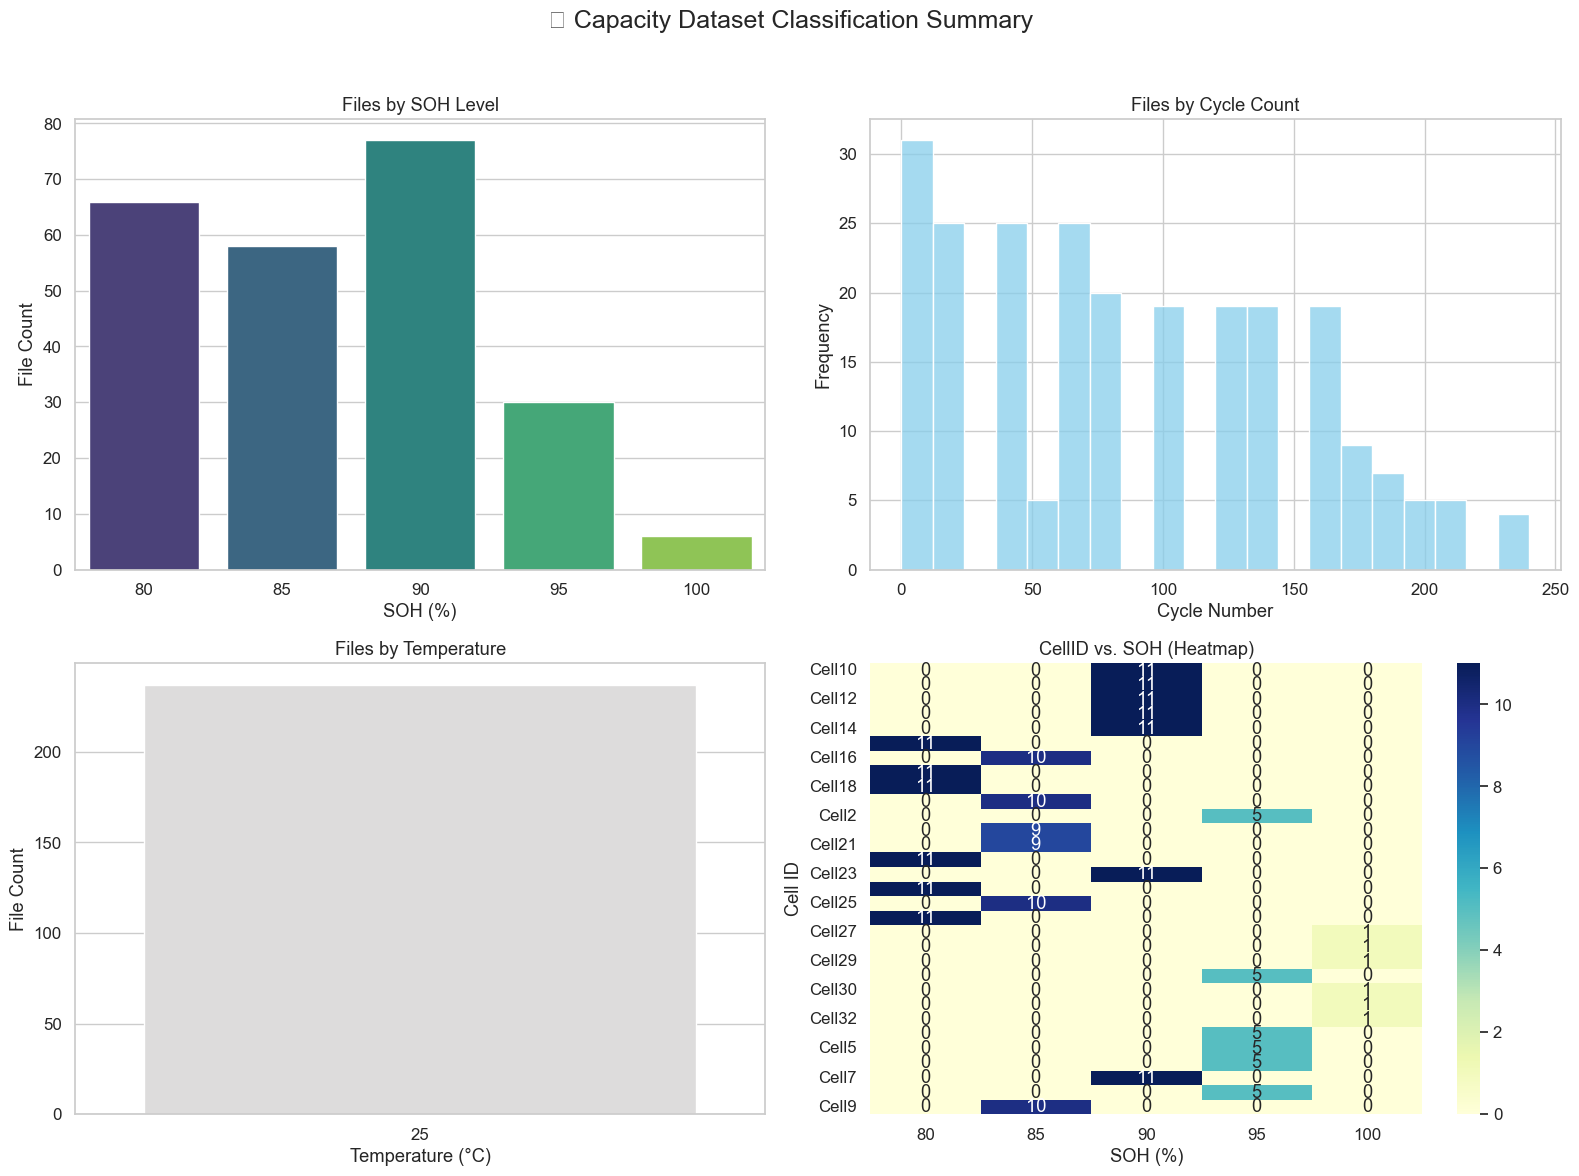

In [43]:
# 📦 Imports
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Path to root dataset
root_dir = r"C:\Users\tmgon\OneDrive - Edith Cowan University\00 - Megallan Power\NMC Batteries Warwick Station\NMC\DIB_Data\.matfiles\Capacity_Check"

# 🔍 Step 1: Recursively collect all .mat file paths
mat_file_paths = []
for dirpath, _, filenames in os.walk(root_dir):
    for filename in filenames:
        if filename.endswith(".mat"):
            mat_file_paths.append(os.path.join(dirpath, filename))

print(f"✅ Found {len(mat_file_paths)} .mat files.")

# 🧠 Step 2: Extract metadata from filenames and folders
metadata = []
pattern = re.compile(
    r"Cell(?P<cell>\d+)_"
    r"(?P<soh>\d+)SOH_"
    r"Capacity_Check_(?P<temp>\d+)degC_"
    r"(?P<cycle>\d+)cycle"
)

for path in mat_file_paths:
    folder = os.path.basename(os.path.dirname(path))
    filename = os.path.basename(path)
    match = pattern.search(filename)
    if match:
        metadata.append({
            "FilePath": path,
            "CellID": f"Cell{match.group('cell')}",
            "SOH": int(match.group('soh')),
            "Temp": int(match.group('temp')),
            "Cycle": int(match.group('cycle')),
            "Folder": folder,
            "FileName": filename
        })

df_meta = pd.DataFrame(metadata)

# ✅ Convert categories
df_meta["SOH"] = df_meta["SOH"].astype(int)
df_meta["Temp"] = df_meta["Temp"].astype(int)
df_meta["Cycle"] = df_meta["Cycle"].astype(int)
df_meta["CellID"] = df_meta["CellID"].astype("category")

# 📊 Step 3: Plotting summary classification statistics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("📊 Capacity Dataset Classification Summary", fontsize=18)

# 🔹 Distribution of files by SOH
sns.countplot(data=df_meta, x="SOH", ax=axes[0, 0], palette="viridis")
axes[0, 0].set_title("Files by SOH Level")
axes[0, 0].set_xlabel("SOH (%)")
axes[0, 0].set_ylabel("File Count")

# 🔹 Distribution of files by Cycle
sns.histplot(data=df_meta, x="Cycle", bins=20, ax=axes[0, 1], color="skyblue")
axes[0, 1].set_title("Files by Cycle Count")
axes[0, 1].set_xlabel("Cycle Number")
axes[0, 1].set_ylabel("Frequency")

# 🔹 Distribution by Temperature
sns.countplot(data=df_meta, x="Temp", ax=axes[1, 0], palette="coolwarm")
axes[1, 0].set_title("Files by Temperature")
axes[1, 0].set_xlabel("Temperature (°C)")
axes[1, 0].set_ylabel("File Count")

# 🔹 Heatmap of SOH vs. CellID
heat_data = pd.crosstab(df_meta["CellID"], df_meta["SOH"])
sns.heatmap(heat_data, cmap="YlGnBu", annot=True, fmt="d", ax=axes[1, 1])
axes[1, 1].set_title("CellID vs. SOH (Heatmap)")
axes[1, 1].set_xlabel("SOH (%)")
axes[1, 1].set_ylabel("Cell ID")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
